# **Super Market Data Analysis**

###### The dataset used in this analysis is taken from Kaggle,which consists of historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

In [57]:
# Importing required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Importing the sales data set

data = pd.read_csv(r'C:\Users\ltaru\OneDrive\Documents\Data_Analytics_2022\Projects\Sales_analysis/supermarket_sales.csv')

In [59]:
# Display first five rows

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [60]:
# Return a tuple representing the dimensionality of the DataFrame

data.shape

(1000, 17)

In [61]:
# Return an int representing the number of elements

data.size

17000

In [62]:
# Display last five rows

data.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [63]:
# information about a DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [64]:
# Generate descriptive statistics

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [65]:
# Renaming "cogs" column to "cost of goods sold"
data.rename (columns = {'cogs':'cost of goods sold'},inplace = True)

In [66]:
# Replacing space in column name with '_'

data.columns = data.columns.str.replace(' ', '_')

In [67]:
# To detect missing values

data.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cost_of_goods_sold         0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [68]:
# Checking for the duplicated value

data.duplicated().sum()

0

In [69]:
# Count number of distinct elements 

data.nunique()

Invoice_ID                 1000
Branch                        3
City                          3
Customer_type                 2
Gender                        2
Product_line                  6
Unit_price                  943
Quantity                     10
Tax_5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cost_of_goods_sold          990
gross_margin_percentage       1
gross_income                990
Rating                       61
dtype: int64

In [70]:
# Display data type of each column
data.dtypes

Invoice_ID                  object
Branch                      object
City                        object
Customer_type               object
Gender                      object
Product_line                object
Unit_price                 float64
Quantity                     int64
Tax_5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cost_of_goods_sold         float64
gross_margin_percentage    float64
gross_income               float64
Rating                     float64
dtype: object

#### Number of branches for each city

In [71]:
Branch_count_city = data.groupby(['City'])['Branch'].count().sort_values(ascending=False)
Branch_count_city

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: Branch, dtype: int64

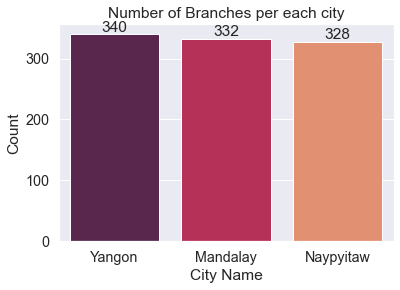

In [72]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax=sns.barplot(Branch_count_city.index,Branch_count_city.values,palette="rocket")
plt.title('Number of Branches per each city')
plt.xlabel('City Name')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)

Yangon has the highest number of branches

#### Branch wise overall income

In [73]:
Branch_income = data.groupby(['Branch'])['gross_income'].sum()
Branch_income

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross_income, dtype: float64

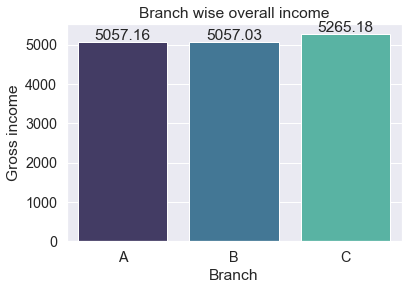

In [74]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax=sns.barplot(Branch_income.index,Branch_income.values,palette="mako")
plt.title('Branch wise overall income')
plt.xlabel('Branch')
plt.ylabel('Gross income')
for i in ax.containers:
    ax.bar_label(i,)

Branch C has the highest income among others

#### Transactions count per each branch

In [75]:
transaction_count = data.groupby(['Branch'])['Invoice_ID'].count()
transaction_count

Branch
A    340
B    332
C    328
Name: Invoice_ID, dtype: int64

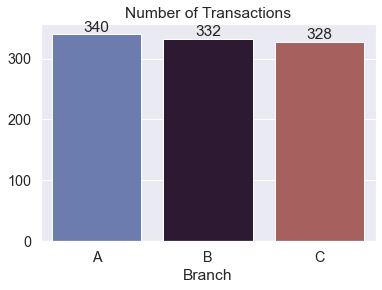

In [76]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax=sns.barplot(transaction_count.index,transaction_count.values,palette='twilight')
plt.title('Number of Transactions')
plt.xlabel('Branch')
plt.ylabel('')
for i in ax.containers:
    ax.bar_label(i,)

Branch A has the highest number of Transactions

#### Top product_line by Total sales

In [77]:
top_product = pd.DataFrame(data.groupby('Product_line').sum()['Total'])

top_product.sort_values(by=['Total'], inplace=True, ascending=False)


top_product = top_product.reset_index()
top_product

,Product_line,Total
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
5,Health and beauty,49193.7390


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Sports and travel'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Fashion accessories'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

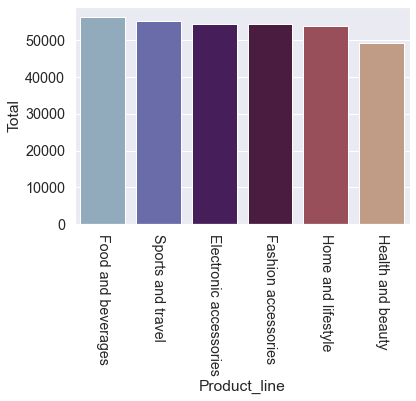

In [78]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.barplot(data=top_product,x="Product_line", y="Total",palette='twilight')
plt.xticks(rotation=270)

Product line Food and beverages created the highest transactional value,followed up with Sports and travel	

#### Top product_line by gross income

In [79]:
top_gross_product = pd.DataFrame(data.groupby('Product_line').sum()['gross_income'])

top_gross_product.sort_values(by=['gross_income'], inplace=True, ascending=False)


top_gross_product = top_gross_product.reset_index()
top_gross_product

,Product_line,gross_income
0,Food and beverages,2673.5640
1,Sports and travel,2624.8965
2,Electronic accessories,2587.5015
3,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
5,Health and beauty,2342.5590


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Sports and travel'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Fashion accessories'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

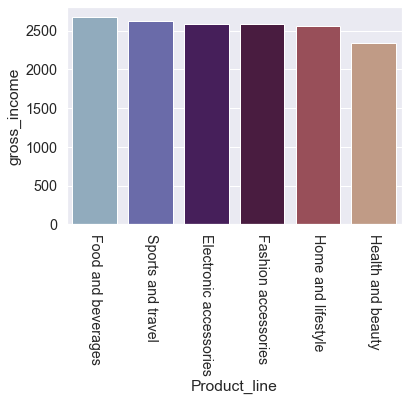

In [80]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.barplot(data=top_gross_product,x="Product_line", y="gross_income",palette='twilight')
plt.xticks(rotation=270)

Product line Food and beverages created the highest Gross income,followed up with Sports and travel	

#### Overall Mean Rating

In [81]:
np.mean(data['Rating'])

6.972700000000003

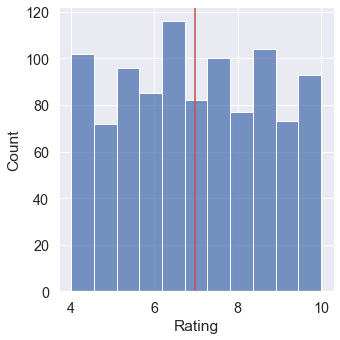

In [82]:
sns.displot(data['Rating'])
plt.axvline(x=np.mean(data['Rating']),c='r',label = 'Avg Rating')

Mean rating of all the stores is 6.97

#### Branch wise ratings

In [83]:
Branch_rating = data.groupby(['Branch'])['Rating'].mean()
Branch_rating

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

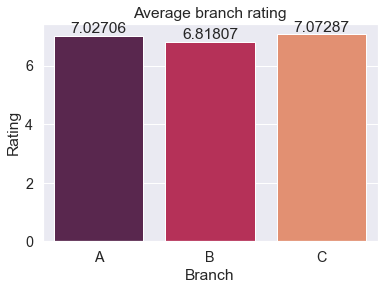

In [84]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax=sns.barplot(Branch_rating.index,Branch_rating.values,palette="rocket")
plt.title('Average branch rating')
plt.xlabel('Branch')
plt.ylabel('Rating')
for i in ax.containers:
    ax.bar_label(i,)

Branch C has the highest rating among others

#### City wise ratings

In [85]:
city_ratings = data.groupby('City')['Rating'].median()
city_ratings

City
Mandalay     6.7
Naypyitaw    7.1
Yangon       7.1
Name: Rating, dtype: float64

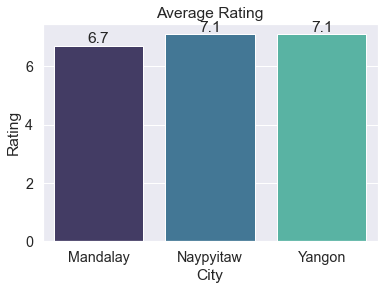

In [86]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax=sns.barplot(city_ratings.index,city_ratings.values,palette="mako")
plt.title('Average Rating')
plt.xlabel('City')
plt.ylabel('Rating')
for i in ax.containers:
    ax.bar_label(i,)

#### City with most gross income

In [87]:
gross_in_c = data.groupby('City')['gross_income'].median()
gross_in_c 

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: gross_income, dtype: float64

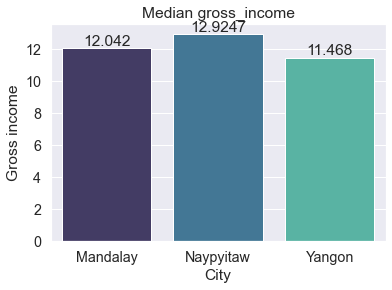

In [88]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax=sns.barplot(gross_in_c.index,gross_in_c.values,palette="mako")
plt.title('Median gross_income')
plt.xlabel('City')
plt.ylabel('Gross income')
for i in ax.containers:
    ax.bar_label(i,)

Naypyitaw City & Yangon stores has the highest median gross income

#### Count of customer Type

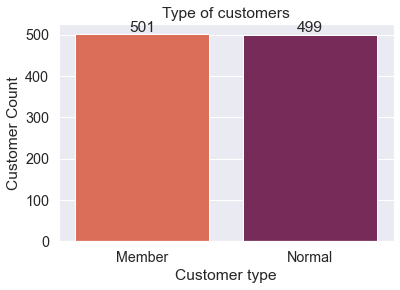

In [89]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax = sns.countplot(x = "Customer_type", data = data, palette = "rocket_r")
ax.set_title("Type of customers")
ax.set_xlabel("Customer type")
ax.set_ylabel("Customer Count")
for i in ax.containers:
    ax.bar_label(i,)

Customers with membership visit stores frequently,but there isn't huge difference

#### Count of customer Type for each branch


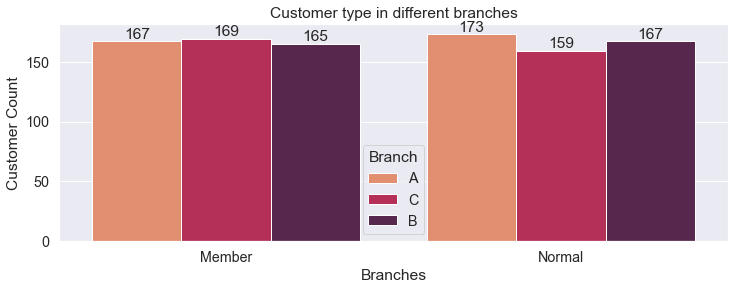

In [90]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
ax = sns.countplot(x = "Customer_type", hue = "Branch", data = data, palette= "rocket_r")
ax.set_title(label = "Customer type in different branches")
ax.set_xlabel(xlabel = "Branches")
ax.set_ylabel(ylabel = "Customer Count")
for i in ax.containers:
    ax.bar_label(i,)

#### Payment modes

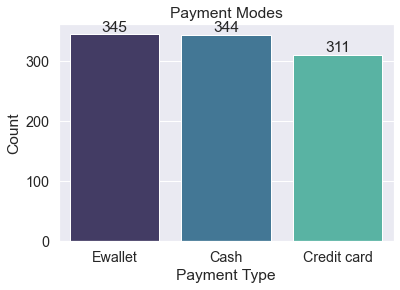

In [91]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
ax = sns.countplot(x = "Payment", data = data, palette = "mako")
ax.set_title("Payment Modes")
ax.set_xlabel("Payment Type")
ax.set_ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

More number of transactions are done via Ewallet & Cash comapred to Credit card

 #### Payment modes per each branch

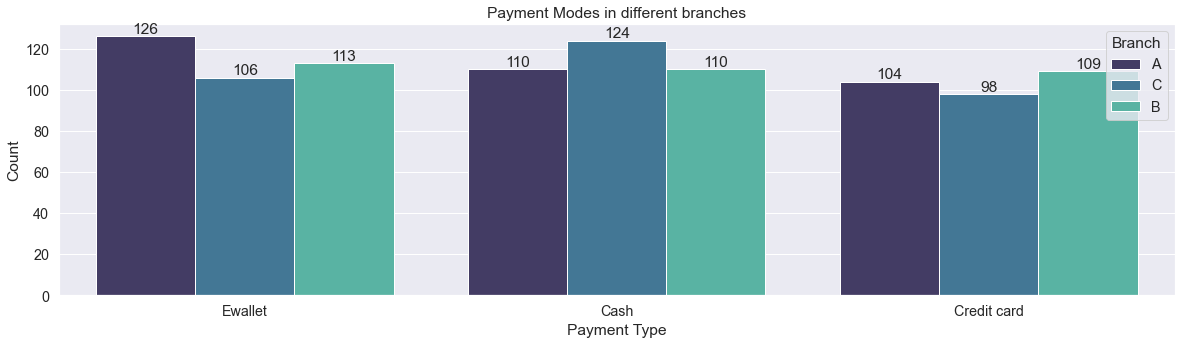

In [92]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x = "Payment", hue = "Branch", data = data, palette= "mako")
ax.set_title(label = "Payment Modes in different branches")
ax.set_xlabel(xlabel = "Payment Type")
ax.set_ylabel(ylabel = "Count")
for i in ax.containers:
    ax.bar_label(i,)

Customers visiting branch A has prefered Ewallet , 
Customers visiting branch B has prefered credit card &
Customers visiting branch C has prefered Cash

#### Payment mode Vs Gender

In [110]:
# Grouping Data by gender and payment
gender_payment_mode = pd.DataFrame(data.groupby(['Gender', 'Payment']).sum()['Total'])

# Sorting the values based on gender and Total
gender_payment_mode.sort_values(['Gender','Total'], ascending=False)

Total
Gender Payment               
Male   Ewallet      55122.837
       Cash         52692.360
       Credit card  47268.627
Female Cash         59514.210
       Ewallet      54870.270
       Credit card  53498.445

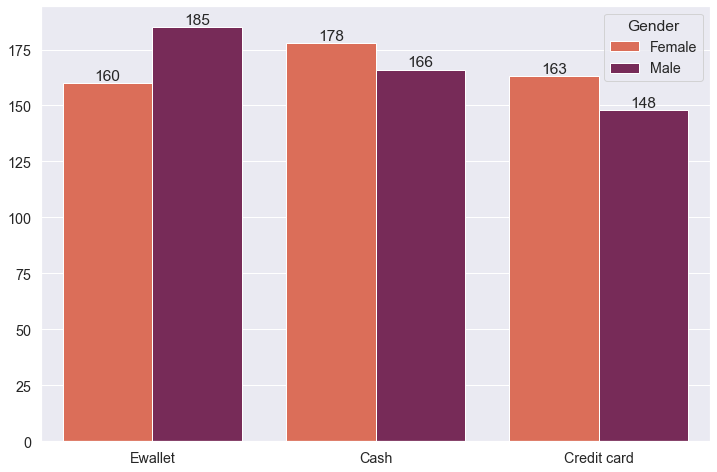

In [116]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
ax = sns.countplot(x = "Payment", hue = "Gender", data = data, palette= "rocket_r")
ax.set_title(label = "")
ax.set_xlabel(xlabel = "")
ax.set_ylabel(ylabel = "")
for i in ax.containers:
    ax.bar_label(i,)

Male prefer to pay for their product using Ewallet

Female prefer to pay for their product using Cash

#### Deriving Day , Month and Year from Date column

In [93]:
data.dtypes

Invoice_ID                  object
Branch                      object
City                        object
Customer_type               object
Gender                      object
Product_line                object
Unit_price                 float64
Quantity                     int64
Tax_5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cost_of_goods_sold         float64
gross_margin_percentage    float64
gross_income               float64
Rating                     float64
dtype: object

In the above we can observe that the column Date & Time is of type object insted of datetime

In [94]:
data['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [95]:
type(data['Date'][0])

str

In [96]:
from pandas import to_datetime

In [97]:
data['Date'] = to_datetime(data['Date'])

In [98]:
data['Date'].dtype

dtype('<M8[ns]')

In [99]:
data['Time'] = to_datetime(data['Time'])

In [100]:
data['Time'].dtype

dtype('<M8[ns]')

In [101]:
data['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [102]:
data['day'] = (data['Date']).dt.day
data['month'] = (data['Date']).dt.month
data['year'] = (data['Date']).dt.year

In [103]:
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cost_of_goods_sold,gross_margin_percentage,gross_income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-10-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-10-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-10-09 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-10-09 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-10-09 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [104]:
data['hour'] = data['Time'].dt.hour

In [105]:
data.describe()

,Unit_price,Quantity,Tax_5%,Total,cost_of_goods_sold,gross_margin_percentage,gross_income,Rating,day,month,year,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [106]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit_price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax_5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cost_of_goods_sold,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross_margin_percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


In [107]:
corr_matrix = np.round(data.corr(),2)
corr_matrix

,Unit_price,Quantity,Tax_5%,Total,cost_of_goods_sold,gross_margin_percentage,gross_income,Rating,day,month,year,hour
Unit_price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax_5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
cost_of_goods_sold,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
gross_margin_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


<AxesSubplot:>

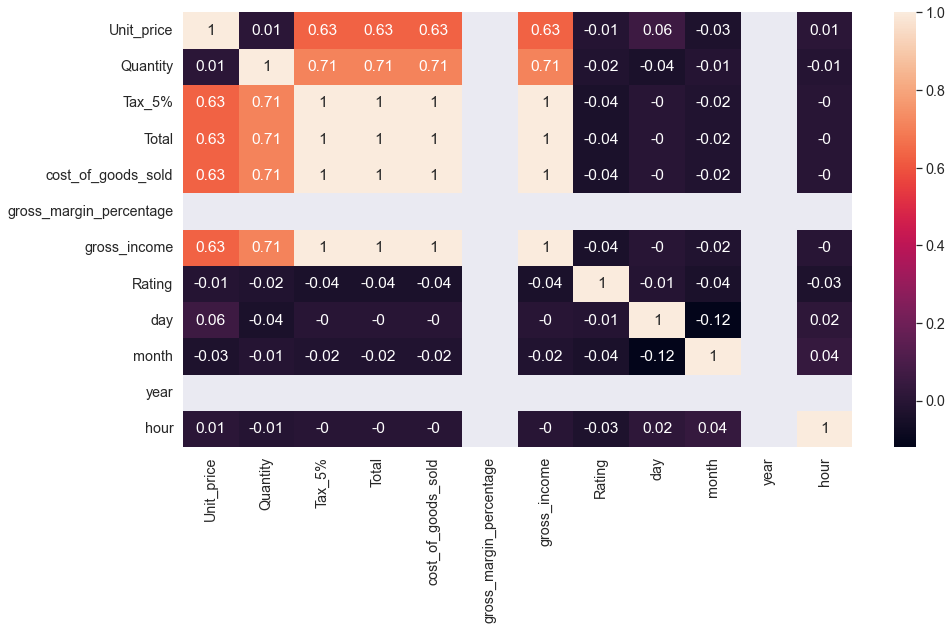

In [108]:
plt.figure(figsize = (15,8) )
sns.heatmap(corr_matrix,annot = True)

In [142]:
# Creating function for the line & rel plot

In [143]:
def return_lineplot(x_column,y_column):
    return sns.lineplot(x=x_column,y=y_column,data = data)

In [131]:
#Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other.
#relplot() lets us create subplots in a single feature.
def return_relplot(x_col,y_col,hue_name = None,style_name = None,row_name = None,col_name = None,rel_type = None):
    sns.relplot(data=data, x=x_col, y=y_col, hue=hue_name, style=style_name, row=row_name, col=col_name,kind = rel_type)

#### Units sold Vs Hour

<AxesSubplot:xlabel='hour', ylabel='Quantity'>

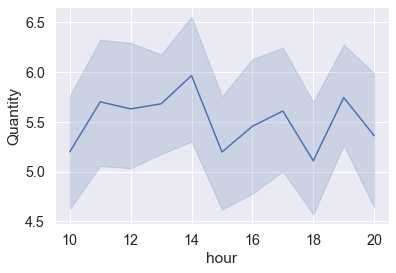

In [144]:
return_lineplot('hour','Quantity')

Most products are sold at around 2 PM

In [127]:
data.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cost_of_goods_sold', 'gross_margin_percentage',
       'gross_income', 'Rating', 'day', 'month', 'year', 'hour'],
      dtype='object')

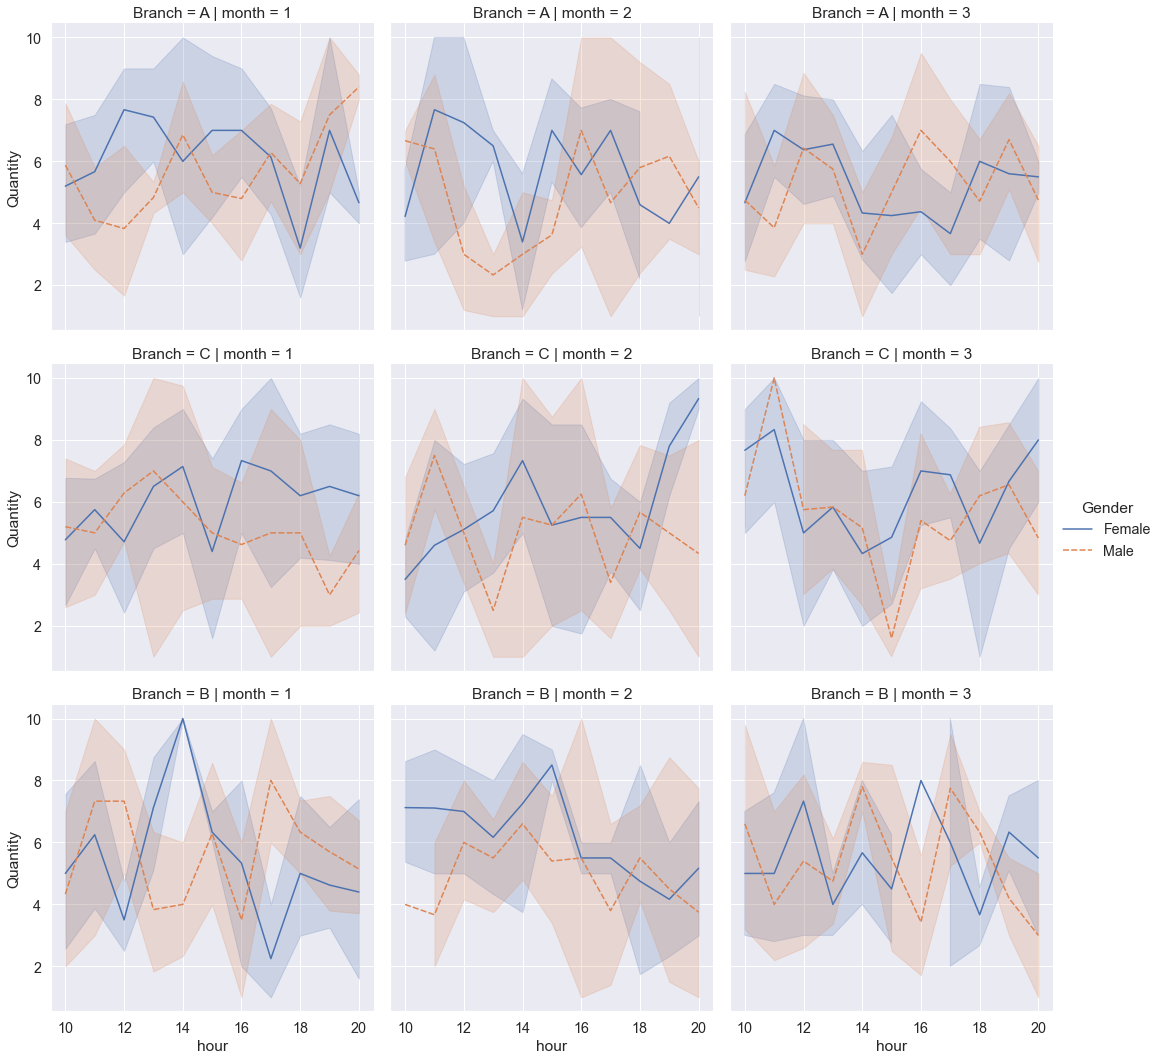

In [132]:
return_relplot(x_col = 'hour',y_col = 'Quantity',hue_name = 'Gender',style_name = 'Gender',row_name = 'Branch',col_name = 'month',rel_type = 'line')

#### Influence of Customer_type on Ratings

<AxesSubplot:xlabel='Customer_type', ylabel='Rating'>

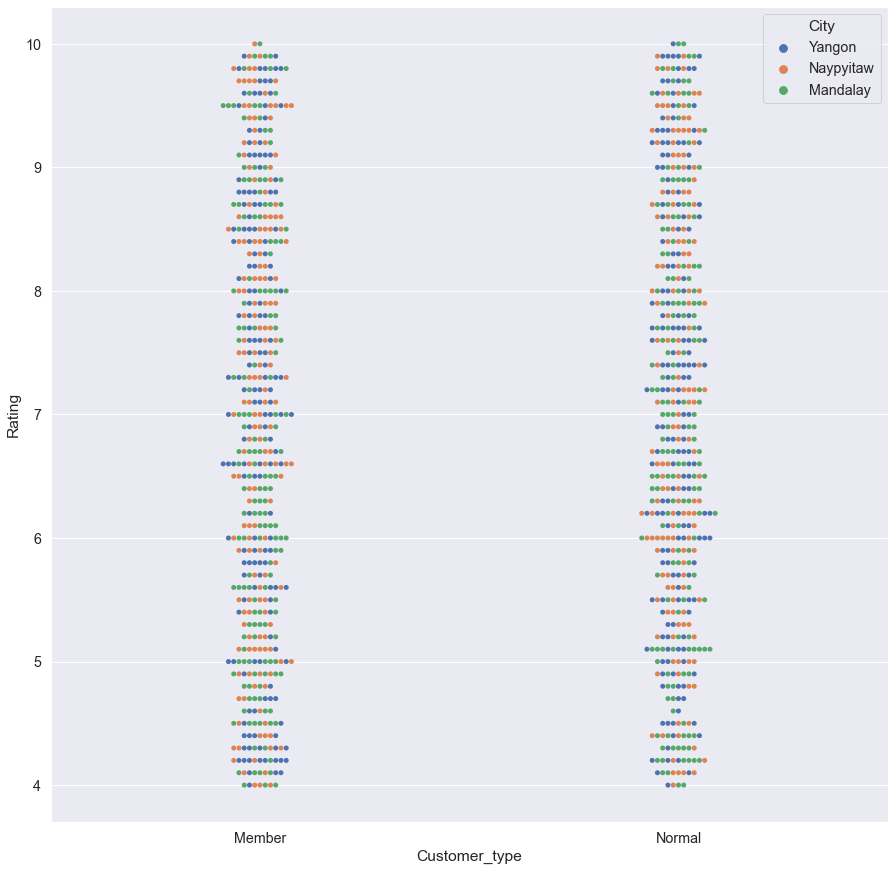

In [140]:
#A swarm plot is a type of scatter plot that is used for representing categorical values.
plt.figure(figsize = (15,15))
sns.swarmplot(x='Customer_type',y='Rating',data = data,hue='City')


Ratings provided by Members and Normal customers are almost similar.